# CSE 6240 - Web Search & Text Mining - Homework 1
                                             


In [44]:
# __author__ = 'Bhanu Verma'
# GTid = '903151012'

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
%matplotlib inline

# Question 3.a

In [46]:
df_a = pd.read_csv('ml-100k/ua.base', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
df_b = pd.read_csv('ml-100k/ub.base', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
df = pd.merge(df_a, df_b, how='outer')

In [47]:
test_a = pd.read_csv('ml-100k/ua.test', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
test_b = pd.read_csv('ml-100k/ub.test', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
test_df = pd.merge(test_a, test_b, how='outer')

In [48]:
user_df = df.groupby(['user_id']).count()
item_df = df.groupby(['item_id']).count()

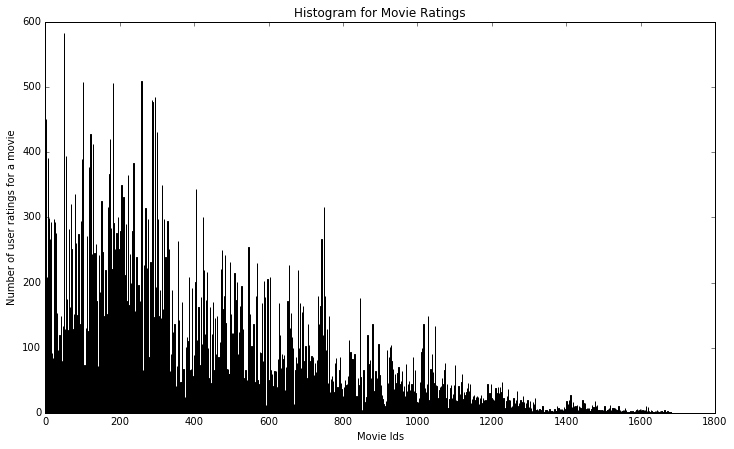

In [49]:
plt.figure(1, figsize=(12, 7))
plt.xlabel('Movie Ids')
plt.ylabel('Number of user ratings for a movie')
plt.title('Histogram for Movie Ratings')
plt.bar(list(item_df.index), item_df['user_id'].values)
plt.show()

# Question 3.b

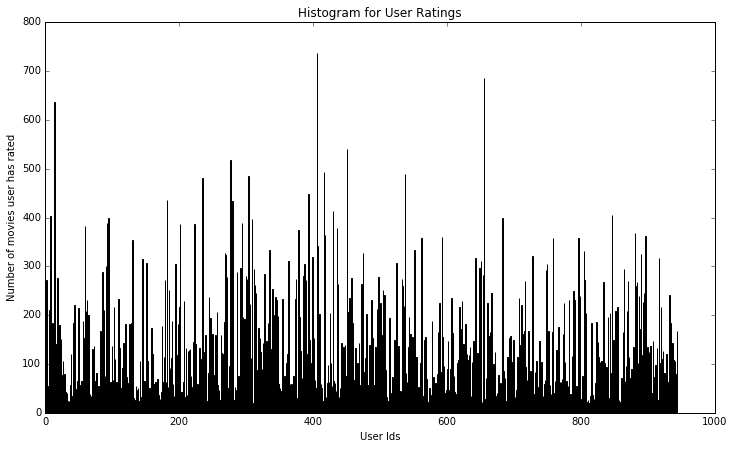

In [50]:
plt.figure(2, figsize=(12, 7))
plt.xlabel('User Ids')
plt.ylabel('Number of movies user has rated')
plt.title('Histogram for User Ratings')
plt.bar(list(user_df.index), user_df['item_id'].values)
plt.show()

# Question 4.a

In [51]:
user = df['user_id'].values
item = df['item_id'].values
ratings = df['rating'].values
mat = csr_matrix((ratings, (user, item)))

In [52]:
u_test = test_df['user_id'].values
i_test = test_df['item_id'].values
t_rating = test_df['rating'].values

In [53]:
mat_sum = mat.sum()
mu = mat_sum/float(len(user))
u_count = mat.getnnz(axis=1)
i_count = mat.getnnz(axis=0)

In [54]:
b_u = np.zeros(mat.shape[0])
b_i = np.zeros(mat.shape[1])

for i, val in enumerate(b_u):
    if mat.getrow(i).sum() == 0:
        b_u[i] = 0
    else:
        b_u[i] = (mat.getrow(i).sum()/float(u_count[i])) - mu

for i, val in enumerate(b_i):
    if mat.getcol(i).sum() == 0:
        b_i[i] = 0
    else:
        b_i[i] = (mat.getcol(i).sum()/float(i_count[i])) - mu

In [56]:
sigma = 0

for i, val in enumerate(t_rating):
    sigma += (val - (mu + b_u[int(u_test[i])] + b_i[int(i_test[i])]))**2

rmse = (sigma/float(len(t_rating)))**0.5
print rmse

0.961201177831


# Question 4.b